# Analyze load data

In [88]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [89]:
# Get data from GitHub URL
data = "/content/hrl_load_metered.csv"

# Read the CSV file
df = pd.read_csv(data)

# Display
display(df.head(10))

,datetime_beginning_utc,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw,is_verified
0,10/31/2024 4:00:00 AM,10/31/2024 12:00:00 AM,RFC,MIDATL,AE,AECO,794.051,True
1,10/31/2024 4:00:00 AM,10/31/2024 12:00:00 AM,RFC,WEST,AEP,AEPAPT,3341.897,True
2,10/31/2024 4:00:00 AM,10/31/2024 12:00:00 AM,RFC,WEST,AEP,AEPIMP,2725.475,True
3,10/31/2024 4:00:00 AM,10/31/2024 12:00:00 AM,RFC,WEST,AEP,AEPKPT,495.415,True
4,10/31/2024 4:00:00 AM,10/31/2024 12:00:00 AM,RFC,WEST,AEP,AEPOPT,5704.064,True
5,10/31/2024 4:00:00 AM,10/31/2024 12:00:00 AM,RFC,WEST,AP,AP,4234.448,True
6,10/31/2024 4:00:00 AM,10/31/2024 12:00:00 AM,RFC,MIDATL,BC,BC,2509.022,True
7,10/31/2024 4:00:00 AM,10/31/2024 12:00:00 AM,RFC,WEST,CE,CE,9624.799,True
8,10/31/2024 4:00:00 AM,10/31/2024 12:00:00 AM,RFC,WEST,DAY,DAY,1612.900,False
9,10/31/2024 4:00:00 AM,10/31/2024 12:00:00 AM,RFC,WEST,DEOK,DEOK,2344.337,True


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263520 entries, 0 to 263519
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   datetime_beginning_utc  263520 non-null  object 
 1   datetime_beginning_ept  263520 non-null  object 
 2   nerc_region             263520 non-null  object 
 3   mkt_region              263520 non-null  object 
 4   zone                    263520 non-null  object 
 5   load_area               263520 non-null  object 
 6   mw                      263520 non-null  float64
 7   is_verified             263520 non-null  bool   
dtypes: bool(1), float64(1), object(6)
memory usage: 14.3+ MB


In [91]:
df.describe()

,mw
count,263520.000000
mean,6232.804703
std,16854.188689
min,0.000000
25%,673.951750
50%,2309.006000
75%,4670.853000
max,160154.429000


Bowling Green is in the ATSI zone

In [92]:
# Filter dataset for ATSI zone then create a copy
df_atsi =  df[df['zone'] == 'ATSI'].copy()

In [93]:
df_atsi.head()

,datetime_beginning_utc,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw,is_verified
17,10/31/2024 4:00:00 AM,10/31/2024 12:00:00 AM,RFC,WEST,ATSI,OE,5786.902,True
19,10/31/2024 4:00:00 AM,10/31/2024 12:00:00 AM,RFC,WEST,ATSI,PAPWR,385.296,True
47,10/31/2024 5:00:00 AM,10/31/2024 1:00:00 AM,RFC,WEST,ATSI,OE,5589.089,True
49,10/31/2024 5:00:00 AM,10/31/2024 1:00:00 AM,RFC,WEST,ATSI,PAPWR,378.611,True
77,10/31/2024 6:00:00 AM,10/31/2024 2:00:00 AM,RFC,WEST,ATSI,OE,5505.691,True


### **Column by column description**

- `datetime_beginning_utc`: The date and time marking the start of the hour in Coordinated Universal Time (UTC). This is the global standard time and does not change for Daylight Saving Time.

- `datetime_beginning_ept`: The date and time marking the start of the hour in Eastern Prevailing Time (EPT). This is the local "wall clock" time used by the PJM grid, which switches between Standard Time (EST) and Daylight Time (EDT).

- `nerc_region`: The reliability region defined by the North American Electric Reliability Corporation.
  - Example:`RFC` stands for "ReliabilityFirst Corporation," which covers the Great Lakes and Mid-Atlantic area.


- `mkt_region`: The specific market region within the PJM grid.

    - Example: `WEST` (Western PJM, like Ohio) or MIDATL (Mid-Atlantic).

- `zone`: The Transmission Zone. This usually corresponds to the service territory of a major utility company (like ATSI for FirstEnergy in Ohio or AEP for American Electric Power). This is the main geographic level for analyzing load.

- `load_area`: A specific sub-area or reporting entity within the Zone.

    - Example: Inside the `ATSI` zone, you might see OE (Ohio Edison) or PAPWR (Penn Power).

- `mw`: The amount of electricity load (demand) measured in Megawatts. This is the actual power being used during that hour.

- `is_verified`: A True/False flag indicating if this data point has been finalized.

    - True: The data is verified and final.

    - False: The data is preliminary and might be subject to minor corrections.

In [94]:
# convert the datetime columns to datetime object
df_atsi['datetime_beginning_ept'] = pd.to_datetime(df_atsi['datetime_beginning_ept'])
df_atsi['datetime_beginning_utc'] = pd.to_datetime(df_atsi['datetime_beginning_utc'])


/tmp/ipython-input-2627719171.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_atsi['datetime_beginning_ept'] = pd.to_datetime(df_atsi['datetime_beginning_ept'])


In [95]:
df_atsi.head()

,datetime_beginning_utc,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw,is_verified
17,2024-10-31 04:00:00,2024-10-31 00:00:00,RFC,WEST,ATSI,OE,5786.902,True
19,2024-10-31 04:00:00,2024-10-31 00:00:00,RFC,WEST,ATSI,PAPWR,385.296,True
47,2024-10-31 05:00:00,2024-10-31 01:00:00,RFC,WEST,ATSI,OE,5589.089,True
49,2024-10-31 05:00:00,2024-10-31 01:00:00,RFC,WEST,ATSI,PAPWR,378.611,True
77,2024-10-31 06:00:00,2024-10-31 02:00:00,RFC,WEST,ATSI,OE,5505.691,True


# Hourly Load profile for each load area



In [96]:
df_pivot = df_atsi.pivot_table(
    index='datetime_beginning_ept',
    columns='load_area',
    values='mw',
    aggfunc='mean'
)

df_pivot.head()

load_area,OE,PAPWR
datetime_beginning_ept,,
2024-10-31 00:00:00,5786.902,385.296
2024-10-31 01:00:00,5589.089,378.611
2024-10-31 02:00:00,5505.691,372.387
2024-10-31 03:00:00,5453.580,374.514
2024-10-31 04:00:00,5544.073,385.166


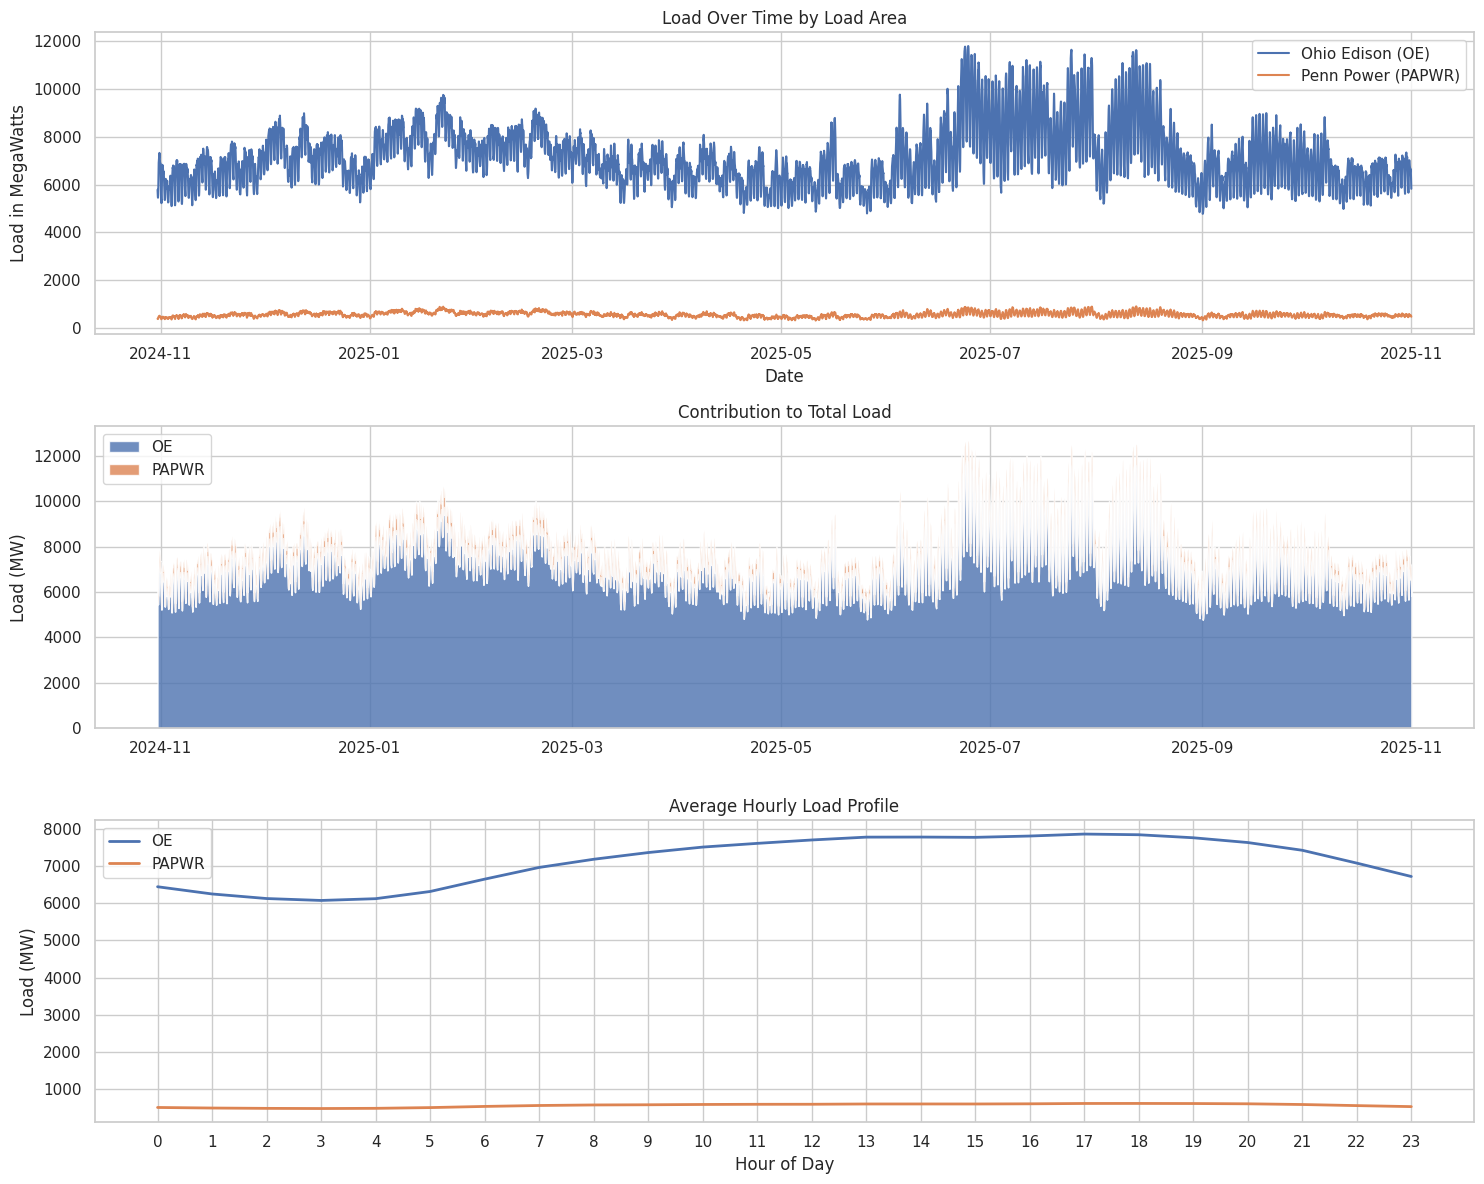

In [97]:
# --- Plotting ---
plt.figure(figsize=(15, 12))

# Line Chart
plt.subplot(3, 1, 1)
plt.plot(df_pivot.index, df_pivot['OE'], label='Ohio Edison (OE)')
plt.plot(df_pivot.index, df_pivot['PAPWR'], label='Penn Power (PAPWR)')
plt.title('Load Over Time by Load Area')
plt.xlabel('Date')
plt.ylabel('Load in MegaWatts')
plt.legend()

# Stacked Area Chart
plt.subplot(3, 1, 2)
plt.stackplot(df_pivot.index, df_pivot['OE'], df_pivot['PAPWR'], labels=['OE', 'PAPWR'], alpha=0.8)
plt.title('Contribution to Total Load')
plt.ylabel('Load (MW)')
plt.legend(loc='upper left')

# Hourly Average Profile
plt.subplot(3, 1, 3)
# Extract hour for grouping
df_atsi['hour'] = df_atsi['datetime_beginning_ept'].dt.hour
hourly_avg = df_atsi.groupby(['hour', 'load_area'])['mw'].mean().unstack()

plt.plot(hourly_avg.index, hourly_avg['OE'], label='OE', linewidth=2)
plt.plot(hourly_avg.index, hourly_avg['PAPWR'], label='PAPWR', linewidth=2)
plt.title('Average Hourly Load Profile')
plt.xlabel('Hour of Day')
plt.ylabel('Load (MW)')
plt.legend()
plt.xticks(range(0, 24))

plt.tight_layout()
plt.show()

## Overall hoursly load

/tmp/ipython-input-2336133344.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y='mw', data=df_atsi_total, palette="Blues")


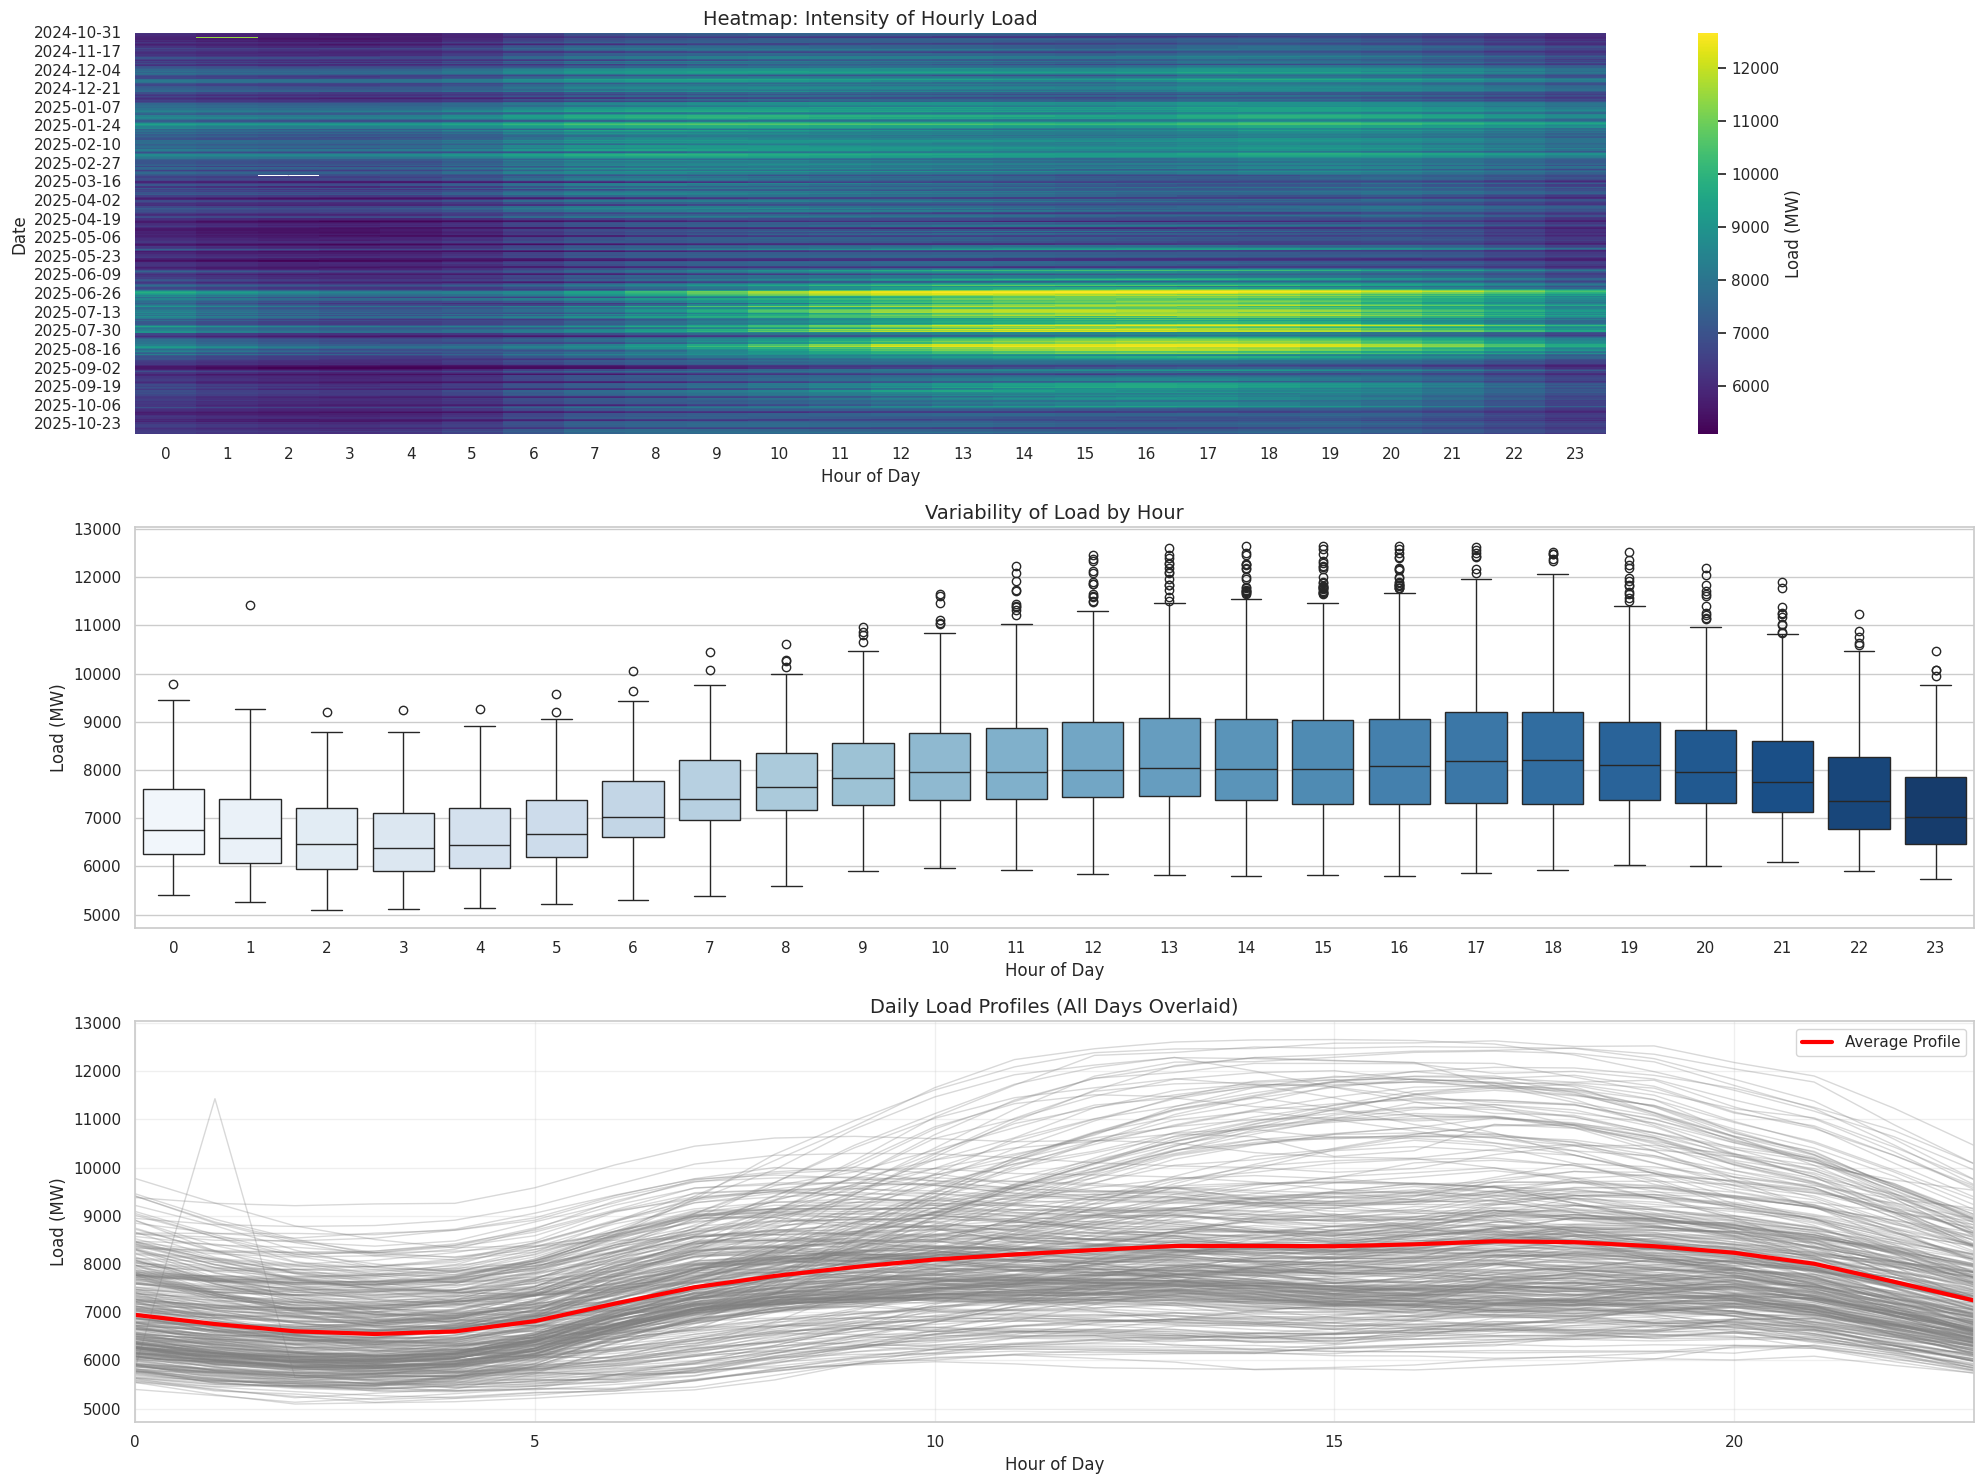

In [98]:
# Group by timestamp to sum the load from all sub-areas (Total ATSI Load)
df_atsi_total = df_atsi.groupby('datetime_beginning_ept')['mw'].sum().to_frame()

# Extract Date and Hour
df_atsi_total['date'] = df_atsi_total.index.date
df_atsi_total['hour'] = df_atsi_total.index.hour

# Create a Pivot Table (Rows=Date, Cols=Hour, Values=MW)
pivot_table = df_atsi_total.pivot_table(index='date', columns='hour', values='mw')

# --- Plotting ---
plt.figure(figsize=(20, 15))

# 1. Heatmap
plt.subplot(3, 1, 1)
sns.heatmap(pivot_table, cmap='viridis', cbar_kws={'label': 'Load (MW)'})
plt.title('Heatmap: Intensity of Hourly Load', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Date')

# 2. Boxplot
plt.subplot(3, 1, 2)
sns.boxplot(x='hour', y='mw', data=df_atsi_total, palette="Blues")
plt.title('Variability of Load by Hour', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Load (MW)')

# 3. Spaghetti Plot (Daily Profiles)
plt.subplot(3, 1, 3)
# Plot each day as a faint grey line
for date in pivot_table.index:
    plt.plot(pivot_table.columns, pivot_table.loc[date], alpha=0.3, color='gray', linewidth=1)

# Plot the average as a bold red line
plt.plot(pivot_table.columns, pivot_table.mean(axis=0), color='red', linewidth=3, label='Average Profile')

plt.title('Daily Load Profiles (All Days Overlaid)', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Load (MW)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 23)

plt.tight_layout()
plt.show()

# Load vs. Cost Analysis

In [99]:
# Get data
file_load = "/content/hrl_load_metered.csv"
file_price = "https://raw.githubusercontent.com/Aaron-Padilla/SolarCoders-MITPolicyHackathon25/main/datasets/ATSI_LMP_2023_2026.csv"

In [100]:
print(f"Reading {file_load}...")
df_load_raw = pd.read_csv(file_load)

print(f"Reading {file_price}...")
df_price_raw = pd.read_csv(file_price)

# Clean & Rename Columns

if "datetime_beginning_utc" in df_load_raw.columns:
    df_load = df_load_raw.rename(columns={"datetime_beginning_utc": "timestamp", "mw": "load_mw"})
else:

    df_load = df_load_raw.rename(columns={df_load_raw.columns[0]: "timestamp", df_load_raw.columns[1]: "load_mw"})

# Standardize Price Headers (GridStatus format)
df_price = df_price_raw.rename(columns={"interval_start_utc": "timestamp", "lmp": "price_rt"})


df_load["timestamp"] = pd.to_datetime(df_load["timestamp"], utc=True)
df_price["timestamp"] = pd.to_datetime(df_price["timestamp"], utc=True)

# 25000 MW is for grid
df_load = df_load[df_load["load_mw"] < 25000]

# Filter Date Range (Dec 31, 2024 to Dec 31, 2025)
start_date = "2024-12-31"
end_date = "2025-12-31"

df_load = df_load[(df_load["timestamp"] >= start_date) & (df_load["timestamp"] <= end_date)]
df_price = df_price[(df_price["timestamp"] >= start_date) & (df_price["timestamp"] <= end_date)]

print(f"✅ Data Filtered: {start_date} to {end_date}")

# --------------------------
df = pd.merge(df_load[["timestamp", "load_mw"]],
              df_price[["timestamp", "price_rt"]],
              on="timestamp",
              how="inner")

# Financial Metrics
# I think price is in cents
df["total_cost_usd"] = (df["load_mw"] * df["price_rt"]) / 100
df["month_name"] = df["timestamp"].dt.month_name()
df["hour"] = df["timestamp"].dt.hour

print(f"✅ Merge Complete: {len(df)} rows ready for plotting.")



Reading /content/hrl_load_metered.csv...
Reading https://raw.githubusercontent.com/Aaron-Padilla/SolarCoders-MITPolicyHackathon25/main/datasets/ATSI_LMP_2023_2026.csv...
✅ Data Filtered: 2024-12-31 to 2025-12-31
✅ Merge Complete: 212396 rows ready for plotting.


In [101]:
df.head()

,timestamp,load_mw,price_rt,total_cost_usd,month_name,hour
0,2024-12-31 00:00:00+00:00,1097.668,20.297726,222.801643,December,0
1,2024-12-31 00:00:00+00:00,4506.584,20.297726,914.734072,December,0
2,2024-12-31 00:00:00+00:00,2947.255,20.297726,598.225744,December,0
3,2024-12-31 00:00:00+00:00,656.452,20.297726,133.244828,December,0
4,2024-12-31 00:00:00+00:00,7256.478,20.297726,1472.900022,December,0


In [102]:
df.tail()

,timestamp,load_mw,price_rt,total_cost_usd,month_name,hour
212391,2025-11-01 03:00:00+00:00,4091.774,36.276065,1484.334596,November,3
212392,2025-11-01 03:00:00+00:00,129.112,36.276065,46.836753,November,3
212393,2025-11-01 03:00:00+00:00,319.538,36.276065,115.915813,November,3
212394,2025-11-01 03:00:00+00:00,99.039,36.276065,35.927452,November,3
212395,2025-11-01 03:00:00+00:00,69.613,36.276065,25.252857,November,3


In [103]:
df.describe()

,load_mw,price_rt,total_cost_usd,hour
count,212396.000000,212396.000000,212396.000000,212396.000000
mean,3249.960512,44.247588,1552.283977,11.494539
std,3551.759326,48.494363,3840.792439,6.924304
min,0.000000,1.859723,0.000000,0.000000
25%,630.671750,26.789682,228.775981,5.000000
50%,2212.880000,35.230722,773.601288,11.000000
75%,4347.356250,49.886303,1775.634164,17.000000
max,24678.126000,1778.464032,422909.463227,23.000000


In [104]:
# import matplotlib.cm as cm
# import matplotlib.colors as mcolors

# fig = plt.figure(figsize=(20, 8))
# gs = fig.add_gridspec(1, 2, wspace=0.1)


# ax1 = fig.add_subplot(gs[0, 0])

# # Resample monthly cost
# monthly_cost = df.set_index("timestamp").resample("ME")["total_cost_usd"].sum() / 1_000_000
# norm = mcolors.Normalize(monthly_cost.min(), monthly_cost.max())
# colors = cm.Reds(norm(monthly_cost.values))

# # Plot Bars
# monthly_cost.plot(kind="bar", ax=ax1, color=colors, edgecolor="black", width=0.8)

# for p in ax1.patches:
#     value = p.get_height()
#     ax1.annotate(f'${value:.1f}M',
#                  (p.get_x() + p.get_width() / 2., value),
#                  ha='center', va='bottom',
#                  fontsize=10, fontweight='bold', color='black',
#                  xytext=(0, 5), textcoords='offset points')

# ax1.set_title("Estimated Monthly Cost (2025)", fontsize=14, fontweight='bold')
# ax1.set_ylabel("Millions USD")
# ax1.set_xlabel("")
# ax1.set_xticklabels([x.strftime('%b') for x in monthly_cost.index], rotation=0)
# ax1.grid(axis='y', linestyle='--', alpha=0.5)
# ax1.set_ylim(0, monthly_cost.max() * 1.15)

# ax2 = fig.add_subplot(gs[0, 1])

# heatmap_data = df.pivot_table(index="month_name", columns="hour", values="price_rt", aggfunc="median")
# month_order = ['January', 'February', 'March', 'April', 'May', 'June',
#                'July', 'August', 'September', 'October', 'November', 'December']
# heatmap_data = heatmap_data.reindex(month_order)

# sns.heatmap(heatmap_data, cmap="coolwarm", ax=ax2, cbar_kws={'label': '$/MWh'})
# ax2.set_title("Price Heatmap (Time of Day)", fontsize=14, fontweight='bold')
# ax2.set_xlabel("Hour of Day (0-23)")
# ax2.set_ylabel("") # Remove Y-label since Month is obvious

# plt.tight_layout()
# plt.show()

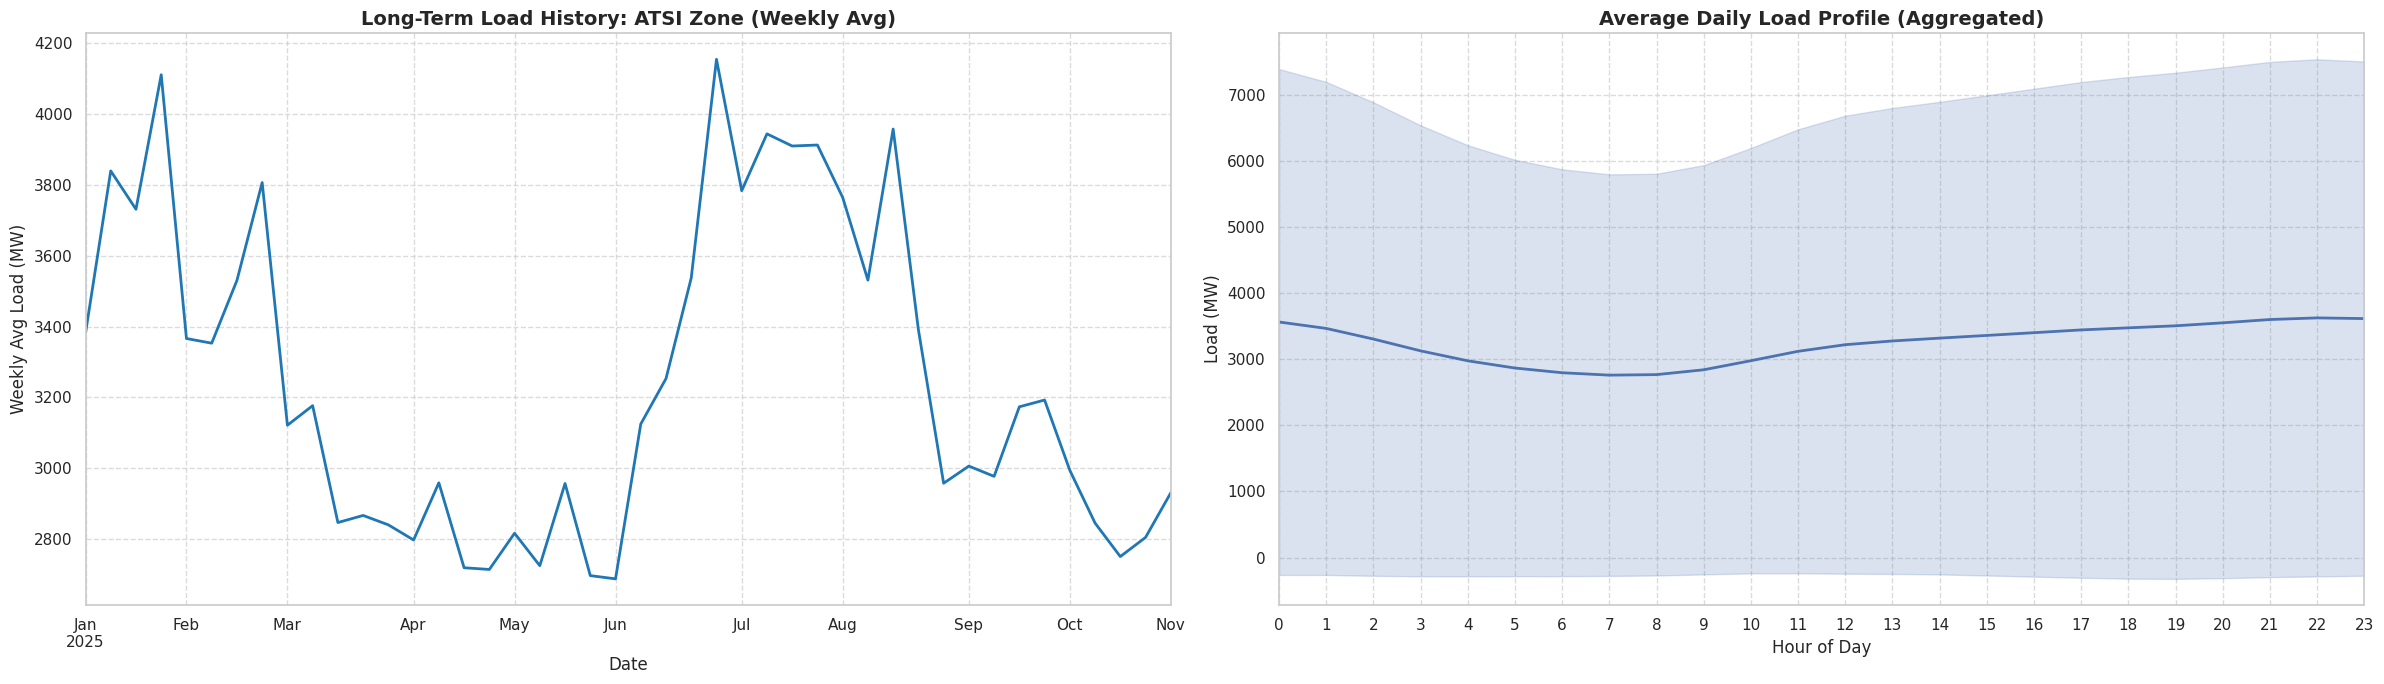

In [105]:
# Long-Term Trendsns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(24, 7))
df.set_index("timestamp").resample("W")["load_mw"].mean().plot(color="#1f77b4", ax=axes[0], linewidth=2)
axes[0].set_title("Long-Term Load History: ATSI Zone (Weekly Avg)", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Weekly Avg Load (MW)")
axes[0].set_xlabel("Date")
axes[0].grid(True, linestyle='--', alpha=0.7)

# Average Daily Profile
sns.lineplot(data=df, x="hour", y="load_mw", errorbar="sd", linewidth=2, ax=axes[1])
axes[1].set_title("Average Daily Load Profile (Aggregated)", fontsize=14, fontweight='bold')
axes[1].set_ylabel("Load (MW)")
axes[1].set_xlabel("Hour of Day")
axes[1].set_xticks(range(0, 24))
axes[1].set_xlim(0, 23)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

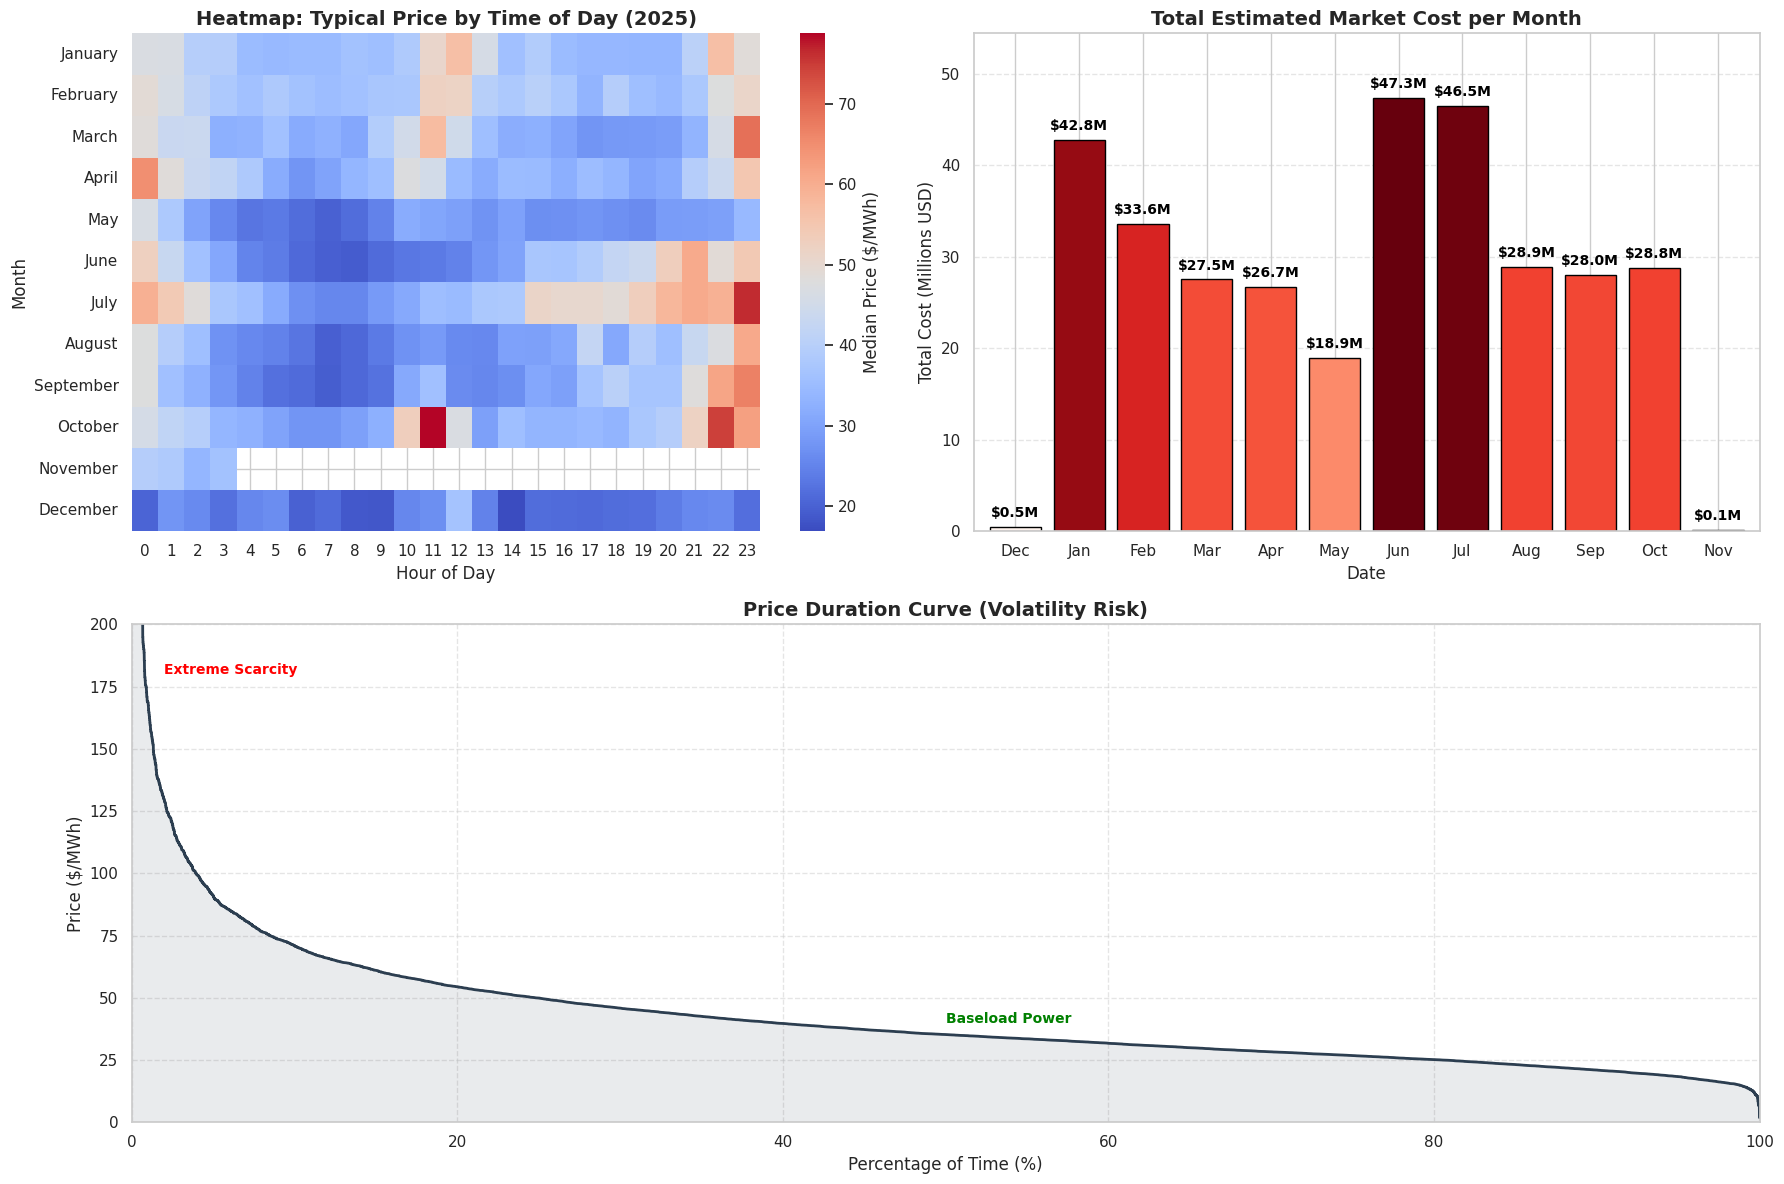

In [106]:
df["month_name"] = df["timestamp"].dt.month_name()
df["total_cost_usd"] = df["load_mw"] * df["price_rt"]/100

# Calculate Monthly Aggregates for the Bar Chart
monthly_cost = df.set_index("timestamp").resample("ME")["total_cost_usd"].sum() / 1_000_000

# Setup Colors for the Bars
norm = plt.Normalize(monthly_cost.min(), monthly_cost.max())
colors = plt.cm.Reds(norm(monthly_cost.values))

# 2. Generate Plots
# -----------------
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 2)

# Calendar Heatmap
ax1 = fig.add_subplot(gs[0, 0])
heatmap_data = df.pivot_table(index="month_name", columns="hour", values="price_rt", aggfunc="median")
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
heatmap_data = heatmap_data.reindex(month_order)

sns.heatmap(heatmap_data, cmap="coolwarm", ax=ax1, cbar_kws={'label': 'Median Price ($/MWh)'})
ax1.set_title("Heatmap: Typical Price by Time of Day (2025)", fontsize=14, fontweight='bold')
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Month")

# Total Estimated Spend
ax2 = fig.add_subplot(gs[0, 1])
monthly_cost.plot(kind="bar", ax=ax2, color=colors, edgecolor="black", width=0.8)

for p in ax2.patches:
    value = p.get_height()
    # Format as "$123.4M"
    ax2.annotate(f'${value:.1f}M',
                 (p.get_x() + p.get_width() / 2., value),
                 ha='center', va='bottom',
                 fontsize=10, fontweight='bold', color='black',
                 xytext=(0, 5), textcoords='offset points')

ax2.set_title("Total Estimated Market Cost per Month", fontsize=14, fontweight='bold')
ax2.set_ylabel("Total Cost (Millions USD)")
ax2.set_xlabel("Date")
ax2.set_xticklabels([x.strftime('%b') for x in monthly_cost.index], rotation=0)
ax2.grid(axis='y', linestyle='--', alpha=0.5)
ax2.set_ylim(0, monthly_cost.max() * 1.15)

# Price Duration Curve (Bottom)
ax3 = fig.add_subplot(gs[1, :])
sorted_prices = df["price_rt"].sort_values(ascending=False).reset_index(drop=True)
x_axis_pct = (sorted_prices.index / len(sorted_prices)) * 100

ax3.plot(x_axis_pct, sorted_prices, color="#2c3e50", linewidth=2)
ax3.fill_between(x_axis_pct, sorted_prices, color="#2c3e50", alpha=0.1)

ax3.set_title("Price Duration Curve (Volatility Risk)", fontsize=14, fontweight='bold')
ax3.set_ylabel("Price ($/MWh)")
ax3.set_xlabel("Percentage of Time (%)")
ax3.set_xlim(0, 100)
ax3.set_ylim(0, 200)

ax3.text(2, 180, "Extreme Scarcity", color="red", fontsize=10, fontweight='bold')
ax3.text(50, 40, "Baseload Power", color="green", fontsize=10, fontweight='bold')
ax3.grid(True, which="both", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()